In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
num_of_rows = len(df)
print(f"The number of rows is {num_of_rows}")

The number of rows is 9704


In [4]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

In [5]:
base = [ 'engine_displacement','horsepower', 'vehicle_weight','model_year','fuel_efficiency_mpg']
df1 = df[base]
df1.head(5)

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


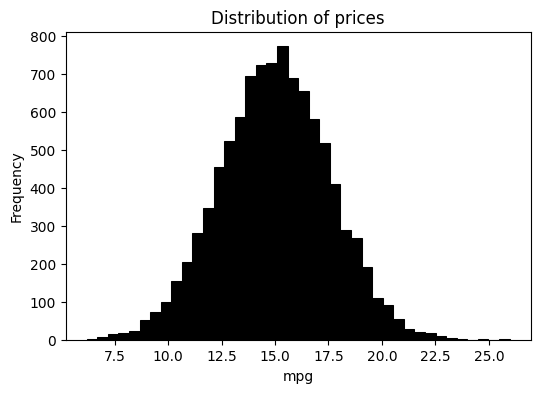

In [8]:
plt.figure(figsize=(6, 4))

sns.histplot(df1.fuel_efficiency_mpg, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('mpg')
plt.title('Distribution of prices')

plt.show()

In [9]:
df1.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [10]:
df1['horsepower'].median()

np.float64(149.0)

In [11]:
np.random.seed(42)

n = len(df1)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [12]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [13]:
df_train['horsepower'] = df_train['horsepower'].fillna(0)
df_train.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [14]:
y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [16]:
w_0, w = train_linear_regression(df_train, y_train)

y_pred = w_0 + df_train.dot(w)

In [17]:
y_pred

483     2.909816
7506    2.842787
8795    2.933106
1688    2.531355
6217    3.032078
          ...   
1696    2.885802
5685    2.432427
6735    2.923297
2052    3.003055
1776    2.944049
Length: 5824, dtype: float64

In [28]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

np.round(rmse(y_train, y_pred),2)

np.float64(0.04)

In [19]:
df1.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [20]:
df_shuffled = df1.iloc[idx]

df_train2 = df_shuffled.iloc[:n_train].copy()
df_val2 = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test2 = df_shuffled.iloc[n_train+n_val:].copy()

In [23]:
df_train2.isnull().sum()
df_train2['horsepower'] = df_train2['horsepower'].fillna(df_train2.horsepower.mean())
df_train2.isnull().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
fuel_efficiency_mpg    0
dtype: int64

In [24]:
df_train2.horsepower.median()

np.float64(149.54476367006487)

In [25]:
w_0, w = train_linear_regression(df_train2, y_train)

y_pred2 = w_0 + df_train2.dot(w)

y_pred2

483     2.865084
7506    2.843151
8795    2.990980
1688    2.554256
6217    3.042929
          ...   
1696    2.885743
5685    2.440151
6735    2.926485
2052    3.012416
1776    2.950596
Length: 5824, dtype: float64

In [27]:
np.round(rmse(y_train, y_pred2),2)

np.float64(0.02)

In [29]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [35]:
w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.039086325392652485
val 0.039979257825777034


In [41]:
w_0, w = train_linear_regression_reg(df_train, y_train, r=0.01)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.039120822415064364
val 0.039977872016356164


In [43]:
w_0, w = train_linear_regression_reg(df_train, y_train, r=0.1)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.03978182696713116
val 0.04050873984547382


In [44]:
w_0, w = train_linear_regression_reg(df_train, y_train, r=1)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))


train 0.040717721675687525
val 0.041353851508238566


In [45]:
w_0, w = train_linear_regression_reg(df_train, y_train, r=10)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.040905246065473015
val 0.04152680123751592


In [46]:
w_0, w = train_linear_regression_reg(df_train, y_train, r=100)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

y_pred = w_0 + df_val.dot(w)
print('val', rmse(y_val, y_pred))

train 0.040925744720228335
val 0.04154575656081053


In [61]:
np.random.seed(0)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
rmse_0 = rmse(y_val, y_pred)
print(f"val {rmse_0}")

train 0.039100215045131115
val 0.03801775537080148


In [62]:
np.random.seed(1)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
rmse_1 = rmse(y_val, y_pred)
print(f"val {rmse_1}")

train 0.0388651074169436
val 0.03927885333921255


In [63]:
np.random.seed(2)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
rmse_2 = rmse(y_val, y_pred)
print(f"val {rmse_2}")

train 0.03902570026567232
val 0.03944653052537959


In [64]:
np.random.seed(3)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
rmse_3 = rmse(y_val, y_pred)
print(f"val {rmse_3}")

train 0.039245076044555065
val 0.038727637037731855


In [65]:
np.random.seed(4)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
rmse_4 = rmse(y_val, y_pred)
print(f"val {rmse_4}")

train 0.03918680725272193
val 0.03727535850054727


In [66]:
np.random.seed(5)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
rmse_5 = rmse(y_val, y_pred)
print(f"val {rmse_5}")

train 0.038843849137581224
val 0.03938438834004637


In [67]:
np.random.seed(6)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
rmse_6 = rmse(y_val, y_pred)
print(f"val {rmse_6}")

train 0.03883943031344286
val 0.03890763931360936


In [68]:
np.random.seed(7)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
rmse_7 = rmse(y_val, y_pred)
print(f"val {rmse_7}")

train 0.03940659525858261
val 0.03837971626977783


In [69]:
np.random.seed(8)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
rmse_8 = rmse(y_val, y_pred)
print(f"val {rmse_8}")

train 0.039185005230288186
val 0.04018986975230982


In [70]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_val_orig = df_val.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_val = np.log1p(df_val.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_train, y_train, r=0)

y_pred = w_0 + df_train.dot(w)
print('train', rmse(y_train, y_pred))

df_val['horsepower'] = df_val['horsepower'].fillna(0)
y_pred = w_0 + df_val.dot(w)
rmse_9 = rmse(y_val, y_pred)
print(f"val {rmse_9}")

train 0.03910175305182104
val 0.03860764644229973


In [72]:
data_rsme = [rmse_0,rmse_1,rmse_2,rmse_3,rmse_4,rmse_5,rmse_6,rmse_7,rmse_8,rmse_9]
std_dev = np.std(data_rsme)
print(std_dev)

0.0007799236944796668


In [85]:
np.random.seed(9)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df1.iloc[idx]

df_train = df_shuffled.iloc[:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train:].copy()

df_test['horsepower'] = df_test['horsepower'].fillna(0)
df_train['horsepower'] = df_train['horsepower'].fillna(0)

y_train_orig = df_train.fuel_efficiency_mpg.values
y_test_orig = df_test.fuel_efficiency_mpg.values

y_train = np.log1p(df_train.fuel_efficiency_mpg.values)
y_test = np.log1p(df_test.fuel_efficiency_mpg.values)

del df_train['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

w_0, w = train_linear_regression_reg(df_test, y_test, r=0.001)

y_pred = w_0 + df_test.dot(w)
print('train', rmse(y_test, y_pred))

rmse_10 = rmse(y_test, y_pred)
print(f"val {rmse_10}")


train 0.03888044097364
val 0.03888044097364
